# Algoritmia
## Práctica 4
El objetivo de esta práctica es trabajar con grafos.
Se pide la implementación de las funciones que aparecen a continuación. 

En el cuerpo de cada función hay una instrucción "pass", se debe sustituir por la implementación adecuada. 

Para cada clase o función que se pide se proporcionan algunos tests. Las implementaciones deberían superar estos tests.

## Preámbulo

In [3]:
# Importaciones
import unittest
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

## Implementa el algoritmo de la mochila

In [7]:
def algoritmo_mochila_voraz(objetos, peso_soportado):
    """
    Se recibe un diccionario de objetos, cada elemento del diccionario es una tupla (peso, valor)
    y una variable numérica, peso_soportado.
    Seleccionar las claves de los objetos cuya suma del peso no sea mayor que el peso soportado y se 
    maximice el valor usando un algoritmo voraz. Los objetos no pueden partirse.
    """
    #Definicion de variables necesarias para el desarrollo del algortimo
    mochila = {}
    valorPeso = [objetos[i][1]/objetos[i][0] for i in range(len(objetos))]
    ValorPesoOrdenado = []
    #valorPeso.extend()
    valorPesoOrdenado = sorted(valorPeso, reverse=True)
    pesoParcial = 0
    valorParcial = 0
    
    #Se recorren los valores de peso ordenados maximizando la machila.
    for i in valorPesoOrdenado:
        if pesoParcial + objetos[valorPeso.index(i)][0] <= peso_soportado:
            pesoParcial += objetos[valorPeso.index(i)][0]
            valorParcial += objetos[valorPeso.index(i)][1]
            mochila[valorPeso.index(i)] = objetos[valorPeso.index(i)]
    
    return mochila
    

In [5]:
class TestMochilaVoraz(unittest.TestCase):
    
    def setUp(self):
        self.casos_prueba = (
            ([i for i in range(10, 60, 10)], [20, 30, 66, 40, 60], 100, 100, 156),
            ([i for i in range(10, 60, 10)], [20, 30, 66, 40, 60], 1000, 150, 216),
            ([i for i in range(10, 60, 10)], [100, 200, 300, 400, 500], 5, 0, 0),
            ([i for i in range(100,210, 20)], [i for i in range (10, 120, 20)], 500, 500, 230)
        )
        
    def test_1(self):        
        def create_dataset(pesos, valores):
            return dict(enumerate(map(lambda x,y: (x,y), pesos, valores)))


        def calcula_peso_y_valor(objetos, candidatos):
            candidatos = list(candidatos)
            peso = sum([objetos[x][0] for x in candidatos])
            valor = sum([objetos[x][1] for x in candidatos])
            return peso, valor


        for pesos, valores, peso_maximo, peso, valor in self.casos_prueba:            
            objetos = create_dataset(pesos, valores)
            candidatos = algoritmo_mochila_voraz(objetos, peso_maximo)
            peso_, valor_ = calcula_peso_y_valor(objetos, candidatos)
            assert peso == peso_
            assert valor == valor_  

## Representación de grafos
Los grafos se representan como diccionarios, donde las claves del diccionario son los nodos del grafo.

Los valores del diccionario son a su vez diccionarios que asocian a cada vecino del nodo el peso del arco.

In [4]:
# Ejemplo de grafo
def grafo_de_ejemplo():
    return {
        'a': {'b': 1, 'c': 2},
        'b': {'a': 3, 'd': 6},
        'c': {'a': 5, 'b': 2},
        'd': {}
    }


print(grafo_de_ejemplo())

{'a': {'b': 1, 'c': 2}, 'b': {'a': 3, 'd': 6}, 'c': {'a': 5, 'b': 2}, 'd': {}}


## Dibujo de grafos.

Para dibujar grafos usamos [NetworkX](https://networkx.github.io/). Se podría usar este paquete para almacenar los grafos, pero en esta práctica hay que trabajar con la representación basada en diccionarios.

### Función `dibuja_grafo`

In [5]:
def dibuja_grafo(grafo, dirigido=True, coordenadas=None):
    """
    Dibuja un grafo, dirigido o no.
    coordenadas es un diccioario que asigna a cada noso su posición.
    """
    nxg = nx.DiGraph() if dirigido else nx.Graph()
    for nodo, adyacentes in grafo.items():
        nxg.add_node(nodo)
        for vecino, peso in adyacentes.items():
            nxg.add_edge(nodo, vecino, peso=peso)
    nx.draw(nxg, with_labels=True, node_size=1000, pos=coordenadas)
    plt.show()

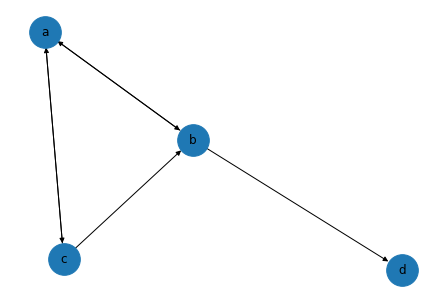

In [6]:
dibuja_grafo(grafo_de_ejemplo())

## Operaciones básicas de consulta
Algunas operaciones básicas sobre grafos


In [7]:
def numero_nodos(grafo):
    """Número de nodos del grafo"""
    return len(grafo)


def numero_arcos(grafo):
    """Número de arcos en el grafo"""
    i=0
    
    for o in grafo:
        for h in grafo[o]:
            i+=1
    return i


def peso_total(grafo):
    """Suma de los pesos de los arcos del grafo"""
    
    peso = 0
    for n in grafo:
        for e in grafo[n]:
            peso = peso + grafo[n][e]
    return peso
    


def arco(grafo, origen, destino):
    """
    Si hay un arco de origen a destino, devuelve su peso. 
    Si no hay, devuelve None.
    """
    return grafo.get(origen, {}).get(destino, None)
  
    


### Tests para las operaciones básicas

In [8]:
class TestOperacionesBasicas(unittest.TestCase):
    
    def tests_grafo_de_ejemplo(self):
        g = grafo_de_ejemplo()
        
        self.assertEqual(numero_nodos(g), 4)
        self.assertEqual(numero_arcos(g), 6)
        self.assertEqual(peso_total(g), 19)
        
        self.assertEqual(arco(g, 'a', 'b'), 1)
        self.assertEqual(arco(g, 'b', 'a'), 3)        
        self.assertEqual(arco(g, 'b', 'd'), 6)        
        self.assertEqual(arco(g, 'd', 'b'), None)        
        self.assertEqual(arco(g, 'x', 'y'), None)

## Operaciones de modificación
Operaciones para modificar el grafo

In [9]:
def inserta_nodo(grafo, nodo):
    """
    Inserta el nodo en el grafo.
    Si ya estaba, no se modifica.
    Devuelve el propio grafo."""
    
    existe = grafo.get(nodo, None)
    if existe == None:
        grafo[nodo] = {}
    return grafo


def inserta_arco(grafo, origen, destino, peso=1):
    """
    Inserta el arco en el grafo.
    Si ya estaba se actualiza el peso.
    Devuelve el propio grafo.
    """
    inserta_nodo(grafo,origen)
    inserta_nodo(grafo,destino)
    grafo[origen][destino] = peso
    return grafo

### Tests para las operaciones de modificación

In [10]:
class TestOperacionesModificacion(unittest.TestCase):
    
    def tests_grafo_de_ejemplo(self):
        g = grafo_de_ejemplo()
        
        self.assertEqual(numero_nodos(g), 4)
        self.assertEqual(numero_arcos(g), 6)
        self.assertEqual(peso_total(g), 19)
        
        inserta_nodo(inserta_nodo(g, 'd'), 'e')
        
        self.assertEqual(numero_nodos(g), 5)
        self.assertEqual(numero_arcos(g), 6)
        self.assertEqual(peso_total(g), 19) 
        
        inserta_arco(inserta_arco(g, 'a', 'b', 7), 'd', 'c', 4)
        
        self.assertEqual(numero_nodos(g), 5)
        self.assertEqual(numero_arcos(g), 7)
        self.assertEqual(peso_total(g), 29) 

        inserta_arco(inserta_arco(g, 'f', 'g', 4), 'g', 'f', 3)
        
        self.assertEqual(numero_nodos(g), 7)
        self.assertEqual(numero_arcos(g), 9)
        self.assertEqual(peso_total(g), 36)           

## Consulta de arcos adyacentes
Operaciones que proporcionan información sobre los arcos adyacentes a un nodo.

In [11]:
def grado(grafo, nodo, salida=True):
    """
    Devuelve el grado de salida o entrada de un nodo del grafo.
    Estos grados son el número de arcos que salen o llegan al nodo.
    """
    existe = grafo.get(nodo, None)
    if existe == None:
        return 0
    if salida == True:
        return len(grafo[nodo])
    else:
        cont = 0
        for i in grafo:
            for j in grafo[i]:
                if j == nodo:
                    cont+=1
        return cont


def pesos_adyacentes(grafo, nodo, salida=True):
 #Revisar

    """
    Devuelve la suma de los pesos de los arcos adyacentes al nodo, 
    de salida o entrada.
    """
    existe = grafo.get(nodo, None)
    if existe == None:
        return 0
    if salida == True:
        cont = sum([grafo[nodo][i] for i in grafo[nodo]])
        return cont
    else:
        cont = sum([arcos.get(nodo, 0) for n, arcos in grafo.items()])
        return cont

### Tests para las operaciones sobre arcos adyacentes

In [12]:
class TestArcosAdyacentes(unittest.TestCase):
    
    def tests_grado_grafo_de_ejemplo(self):
        g = grafo_de_ejemplo()
        
        for nodo, grado_salida, grado_entrada in (
                ('a', 2, 2), ('b', 2, 2), ('c', 2, 1), ('d', 0, 1)
            
        ):
            self.assertEqual(grado(g, nodo), grado_salida)
            self.assertEqual(grado(g, nodo, salida=False), grado_entrada)

    def tests_pesos_grafo_de_ejemplo(self):
        g = grafo_de_ejemplo()
        
        for nodo, pesos_salida, pesos_entrada in (
                ('a', 3, 8), ('b', 9, 3), ('c', 7, 2), ('d', 0, 6)
            
        ):
            self.assertEqual(pesos_adyacentes(g, nodo), pesos_salida)
            self.assertEqual(pesos_adyacentes(g, nodo, salida=False),
                             pesos_entrada)

## Consulta de caminos

In [9]:
def coste_camino(grafo, camino):
#Revisar

    """
    Devuelve el coste del camino en el grafo.
    El camino viene dado como una secuencia de nodos.
    Si esa secuencia no forma un camino, devuelve None.
    """
    cont = 0
    for i in range(len(camino)):
        if i+1 < len(camino):
            if grafo.get(camino[i],None).get(camino[i+1], None):
                cont += grafo[camino[i]][camino[i+1]]
            else:
                return None
        
    return cont
        
    

### Tests para la consulta de caminos

In [10]:
class TestCosteCamino(unittest.TestCase):
    
    def tests_grafo_de_ejemplo(self):
        g = grafo_de_ejemplo()
        
        for camino, coste in (
            (('a', 'b', 'd'), 7),           
            (('b', 'a', 'c', 'a'), 10),
            (('a', 'c', 'a', 'b', 'a'), 11), 
            (('a', 'b', 'd', 'c'), None),       
            (('c', 'a', 'b', 'c'), None)    
        ):
            self.assertEqual(coste_camino(g, camino), coste)

## Recorrido en profundidad
Función para realizar un [recorrido en profundidad](https://youtu.be/oV-edUaj3_A) del grafo.

In [15]:
def recorrido_en_profundidad(grafo, inicio=None):
    """
    Genera los nodos que forman el recorrido en profundidad.
    El recorrido empieza en el nodo inicio.
    Si no se indica un nodo de inicio (o es None), se empieza por el menor nodo.
    Los vecinos de un nodo deben recorrerse en orden ascendente.
    """

    #Si inicio es none, se le asigna el siguiente nodo del grafo en un tierador.
    if inicio is None:
        inicio = next(iter(grafo), inicio)
    #Si inicio no esta en el grafo se devuelve una lista vacia.
    if inicio not in grafo:
        return []
    #Definiciones basicas para el desarrollo del algoritmo.
    actual = inicio
    cerrados = []
    pila = []
    #Añadimos inicio a cerrados.
    cerrados.append(inicio)
    #Se recorre el grafo.
    while True:
        siguientes = False
        for nodo in grafo[actual].keys():
            if nodo not in cerrados and nodo != actual:
                pila.append(actual)
                actual = nodo
                cerrados.append(nodo)
                siguientes = True
                break
        if siguientes is False:
            if len(pila) == 0:
                return cerrados
            actual = pila.pop()

### Tests para el recorrido en profundidad

In [16]:
class TestProfundidad(unittest.TestCase):
    
    def tests_grafo_de_ejemplo(self):
        g = grafo_de_ejemplo()
        
        for inicio, recorrido in (
                ('a', ['a', 'b', 'd', 'c']),
                (None, ['a', 'b', 'd', 'c']),
                ('b', ['b', 'a', 'c', 'd']),            
                ('c', ['c', 'a', 'b', 'd']),            
                ('d', ['d']),
        ):
            self.assertEqual(list(recorrido_en_profundidad(g, inicio)), 
                             recorrido)

## Recorrido en anchura
Función para realizar un [recorrido en anchura](https://youtu.be/w6SB5FWxIV4) del grafo.

In [17]:
def recorrido_en_anchura(grafo, inicio=None):
    """
    Genera los nodos que forman el recorrido en anchura.
    El recorrido empieza en el nodo inicio.
    Si no se indica un nodo de inicio (o es None), se empieza por el menor nodo.
    Los vecinos de un nodo deben recorrerse en orden ascendente.
    """
    #Si inicio es none, se le asigna el siguiente nodo del grafo en un tierador.
    if inicio is None:
        inicio = next(iter(grafo))
    #Si inicio no esta en el grafo se devuelve una lista vacia.
    if inicio not in grafo:
        return []
    #Definiciones basicas para el desarrollo del algoritmo.
    abiertos = []
    cerrados = []
    #Añadimos inicio a abiertos.
    abiertos.append(inicio)
    #Recorremos el grafo.
    while len(abiertos) > 0:
        siguiente = abiertos.pop(0)
        cerrados.append(siguiente)
        abiertos.extend([ nodo for nodo in grafo[siguiente] if nodo not in cerrados and nodo not in abiertos ])

    return cerrados

### Tests para el recorrido en anchura

In [18]:
class TestAnchura(unittest.TestCase):
    
    def tests_grafo_de_ejemplo(self):
        g = grafo_de_ejemplo()
        
        for inicio, recorrido in (
                ('a', ['a', 'b', 'c', 'd']),
                (None, ['a', 'b', 'c', 'd']),
                ('b', ['b', 'a', 'd', 'c']),            
                ('c', ['c', 'a', 'b', 'd']),            
                ('d', ['d']),
        ):
            self.assertEqual(list(recorrido_en_anchura(g, inicio)), 
                             recorrido)

## Grafos lineales
Se crea una función que construye grafos lineales para realizar tests sobre ellos. En un grafo lineal los nodos se organizan en una línea, cada uno tiene un arco al siguiente.

In [19]:
def grafo_lineal(num_nodos=10):
    """
    Función que crea un grafo lineal con el número de nodos indicado.
    """
    g = {}
    
    for n in range(num_nodos-1):
        inserta_arco(g, n, n + 1)
        
    return g

### Dibujo de un grafo lineal

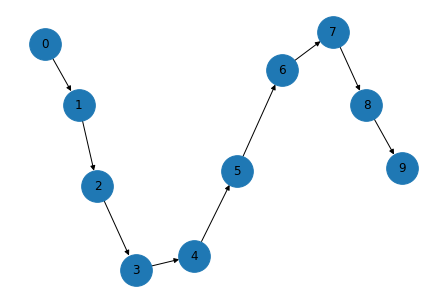

In [20]:
dibuja_grafo(grafo_lineal())   

### Tests sobre grafos lineales

In [21]:
class TestGrafoLineal(unittest.TestCase):
    
    def setUp(self):
        self.numero_nodos = 20
        self.grafo = grafo_lineal(self.numero_nodos)
        
    def test_consultas_basicas(self):
        self.assertEqual(numero_nodos(self.grafo), self.numero_nodos)
        self.assertEqual(numero_arcos(self.grafo), self.numero_nodos - 1)
        self.assertEqual(peso_total(self.grafo), self.numero_nodos - 1)
        for i in range(self.numero_nodos - 1):
            self.assertEqual(arco(self.grafo, i, i + 1), 1)
        for i in range(self.numero_nodos - 2):
            self.assertIsNone(arco(self.grafo, i, i + 2))
            
    def test_arcos_adyacentes(self):
        for funcion in grado, pesos_adyacentes:
            self.assertEqual(funcion(self.grafo, self.numero_nodos - 1), 0)
            self.assertEqual(funcion(self.grafo, 0, salida=False), 0)
            for i in range(self.numero_nodos - 1):
                self.assertEqual(funcion(self.grafo, i), 1)
                self.assertEqual(funcion(self.grafo, i + 1, salida=False), 1)
                
    def test_consulta_caminos(self):
        camino = [0]
        for i in range(1, self.numero_nodos):
            camino.append(i)
            self.assertEqual(coste_camino(self.grafo, camino), i)
            
    def test_profundidad(self):
        self.assertEqual(
            list(recorrido_en_profundidad(self.grafo, self.numero_nodos - 1)), 
            [self.numero_nodos - 1])
        self.assertEqual(list(recorrido_en_profundidad(self.grafo, 0)), 
                         [i for i in range(self.numero_nodos)])
                
    def test_anchura(self):
        self.assertEqual(
            list(recorrido_en_anchura(self.grafo, self.numero_nodos - 1)), 
            [self.numero_nodos - 1])
        self.assertEqual(list(recorrido_en_anchura(self.grafo, 0)),
                         [i for i in range(self.numero_nodos)])        

## Grafos en rejilla
Se crea una función que construye grafos en rejilla para realizar tests sobre ellos. 

In [22]:
def grafo_en_rejilla(num_filas=3, num_columnas=4):
    """
    Función que crea un grafo lineal con el número de nodos indicado.
    """
    g = {}
    
    nodo = 0
    for fila in range(num_filas):
        for columna in range(num_columnas - 1):
            inserta_arco(g, nodo, nodo + 1)
            nodo += 1
        nodo += 1
        
    nodo = 0
    for fila in range(num_filas - 1):
        for columna in range(num_columnas):
            inserta_arco(g, nodo, nodo + num_columnas)
            nodo += 1
        
    return g

### Dibujo de grafos en rejilla

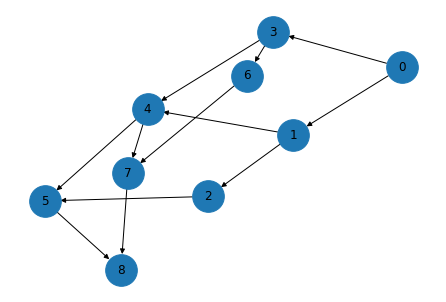

In [23]:
dibuja_grafo(grafo_en_rejilla(3, 3))   

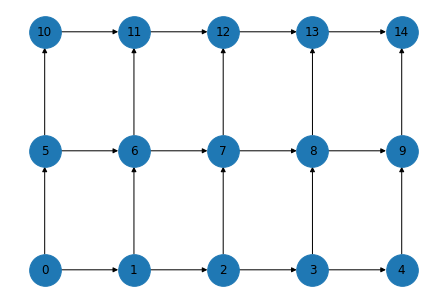

In [24]:
filas, columnas = 3, 5
coordenadas = {i: (i % columnas, i // columnas) for i in range(filas * columnas)}
dibuja_grafo(grafo_en_rejilla(filas, columnas), coordenadas=coordenadas)   

### Tests sobre grafos en rejilla

In [25]:
class TestGrafoEnRejilla(unittest.TestCase):
    def setUp(self):
        self.filas, self.columnas = 5, 7
        self.numero_nodos = self.filas * self.columnas
        self.numero_arcos = 2 * self.filas * self.columnas - self.filas - self.columnas
        self.grafo = grafo_en_rejilla(self.filas, self.columnas)

    def test_consultas_basicas(self):
        self.assertEqual(numero_nodos(self.grafo), self.numero_nodos)
        self.assertEqual(numero_arcos(self.grafo), self.numero_arcos)
        self.assertEqual(peso_total(self.grafo), self.numero_arcos)

        nodo = 0
        for fila in range(self.filas):
            for columna in range(self.columnas - 1):
                self.assertEqual(arco(self.grafo, nodo, nodo + 1), 1)
                self.assertIsNone(arco(self.grafo, nodo + 1, nodo))
                nodo += 1
            nodo += 1

        nodo = 0
        for fila in range(self.filas - 1):
            for columna in range(self.columnas):
                self.assertEqual(arco(self.grafo, nodo, nodo + self.columnas),
                                 1)
                self.assertIsNone(arco(self.grafo, nodo + self.columnas, nodo))
                nodo += 1

    def test_arcos_adyacentes(self):
        for funcion in grado, pesos_adyacentes:
            nodo = 0
            for fila in range(self.filas):
                for columna in range(self.columnas):
                    grado_salida = 2
                    if fila == self.filas - 1:
                        grado_salida -= 1
                    if columna == self.columnas - 1:
                        grado_salida -= 1
                    self.assertEqual(funcion(self.grafo, nodo), grado_salida)

                    grado_entrada = 2
                    if fila == 0:
                        grado_entrada -= 1
                    if columna == 0:
                        grado_entrada -= 1
                    self.assertEqual(funcion(self.grafo, nodo, salida=False),
                                     grado_entrada)

                    nodo += 1

    def test_consulta_caminos(self):
        camino = list(range(self.columnas - 1)) + \
                 [i * self.columnas - 1 for i in range(1, self.filas + 1)]
        self.assertEqual(coste_camino(self.grafo, camino), len(camino) - 1)

        camino = [i * self.columnas for i in range(self.filas - 1)] + \
            list(range(self.numero_nodos - self.columnas, self.numero_nodos))
                 
        self.assertEqual(coste_camino(self.grafo, camino), len(camino) - 1)

    def test_profundidad(self):
        recorrido = list(range(self.columnas - 1))
        recorrido += range(self.columnas - 1, self.numero_nodos, self.columnas)
        for j in range(self.columnas - 1, 0, - 1):
            for i in range(1, self.filas):
                recorrido.append(i * self.columnas + j - 1)
        self.assertEqual(
            list(recorrido_en_profundidad(self.grafo, 0)),
            recorrido)

    def test_anchura(self):
        recorrido = []
        for diagonal in range(self.columnas + self.filas - 1):
            i = 0
            j = diagonal
            if j >= self.columnas:
                i = j - self.columnas + 1
                j = self.columnas - 1
            while j >= 0 and i < self.filas:               
                recorrido.append(i * self.columnas + j)
                i += 1
                j -= 1
        self.assertEqual(
            list(recorrido_en_anchura(self.grafo, 0)),
            recorrido)

## Ejecución de tests

In [11]:
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

E.
ERROR: tests_grafo_de_ejemplo (__main__.TestCosteCamino)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-10-26a05939c4eb>", line 4, in tests_grafo_de_ejemplo
    g = grafo_de_ejemplo()
NameError: name 'grafo_de_ejemplo' is not defined

----------------------------------------------------------------------
Ran 2 tests in 0.003s

FAILED (errors=1)
